In [18]:
!pip3 install scikit-learn

In [19]:
import sklearn.linear_model
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn.linear_model

In [20]:
file_gdp="gdp-bli/gdp_per_capita_2014-2025.csv"
file_happy="gdp-bli/BLI_25112020150937807.csv"

df_gdp=pd.read_csv(file_gdp,thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')
df_happy=pd.read_csv(file_happy,thousands=',')

In [21]:
rows=5
df_gdp.head(rows)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",629.921,599.349,519.219,532.22,505.909,507.29,499.441,505.827,523.013,540.522,555.893,571.606,2019.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4584.920,3953.610,4124.410,4542.76,5284.440,5323.19,4898.280,5160.770,5647.780,6217.290,6623.230,7054.600,2018.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5466.330,4153.320,3918.940,4012.13,4080.910,3898.01,3331.080,3449.420,3512.060,3541.220,3581.020,3641.010,2019.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5625.740,4354.920,3676.830,4303.69,3620.590,2967.96,2021.310,2129.750,2198.090,2317.600,2437.410,2542.210,2017.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13951.990,14696.890,15556.010,15655.23,16860.960,17195.46,14158.570,14747.840,16368.890,17756.520,18558.790,19365.520,2011.0


In [22]:
def prepare_country_stats(data_happy,data_gdp):
    # Process happiness data
    # select rows matching TOT in columns INEQUALITY
    data_happy = data_happy[data_happy["INEQUALITY"]=="TOT"]
    # Create new df using 'Country' column as index and 'Indicator' as columns
    # df is populated using values from column 'Values'
    data_happy = data_happy.pivot(index="Country", columns="Indicator",values="Value")

    # Process GDP data
    # rename column and set a new index
    data_gdp = data_gdp.rename(columns={"2021":"GDP per capita (2020)"})
    data_gdp = data_gdp.set_index("Country")
    
    # Merge both datasets by country
    merged_data = pd.merge(left=data_happy, right=data_gdp,left_index=True, right_index=True)
    merged_data.sort_values(by="GDP per capita (2020)",inplace=True)
    
    # Create two sub datasets for testing and validation
    # We select two specific columns out of the merged dataset
    remove_indices = [0, 1, 6, 8, 33, 34, 35, 36, 37, 38, 39]
    keep_indices = list(set(range(merged_data.shape[0])) - set(remove_indices))
    
    test_data     = merged_data[["GDP per capita (2020)",'Life satisfaction']].iloc[keep_indices]
    validate_data = merged_data[["GDP per capita (2020)",'Life satisfaction']].iloc[remove_indices]
    
    return test_data, validate_data

In [28]:
country_stats_training, country_stats_test = prepare_country_stats(df_happy, df_gdp)


Unable to revert mtime: /Library/Fonts
Matplotlib is building the font cache; this may take a moment.


AttributeError: module 'matplotlib' has no attribute 'show'

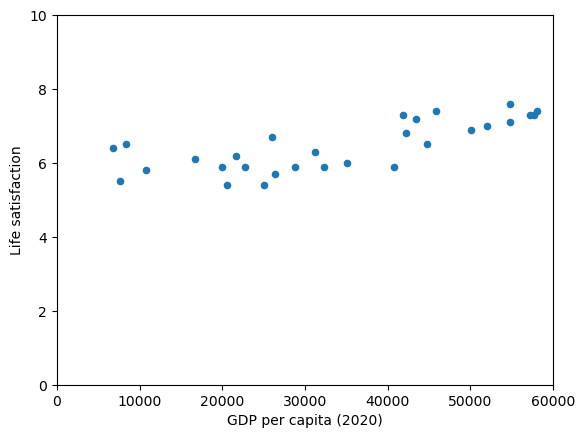

In [29]:
country_stats_training.plot(kind='scatter', x="GDP per capita (2020)", y="Life satisfaction",xlim=[0,60000],ylim=[0,10])
plt.show()

In [30]:
model = sklearn.linear_model.LinearRegression()

In [31]:
x = np.c_[country_stats_training["GDP per capita (2020)"]]
y = np.c_[country_stats_training["Life satisfaction"]]

In [32]:
model.fit(x, y)

LinearRegression()

In [33]:
print(f"Model intercept: {model.intercept_[0]}")
print(f"Model slope: {model.coef_[0][0]}")

Model intercept: 5.386904077474313
Model slope: 3.160840353878392e-05


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(country_stats_test["GDP per capita (2020)"], country_stats_test["Life satisfaction"])
ax1.set_xlim(0,60000)
ax1.set_ylim(0,10)
ax1.set_xlabel("GDP per capita (2020)")
ax1.set_ylabel("Life satisfaction")
x_val=np.array([list(range(0,60000,1000))]).T
ax1.plot(x_val, model.predict(x_val),color='r')
plt.show()